In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import sys

In [2]:
vaccine_path = os.path.join("data")


def load_data(vpath=vaccine_path):
    csv_path = os.path.join(vpath, "vaccine.csv")
    return pd.read_csv(csv_path)


In [3]:
vaccine=load_data()
vaccine=vaccine.reset_index()
l=["14/06/2021", "15/06/2021","16/06/2021","17/06/2021","18/06/2021"]
erase=[]
for i in range(5698):
    s=vaccine.iloc[i,1]
    if(s in l):
        erase.append(i)
vaccine=vaccine.drop(erase)
vaccine=vaccine.drop(columns=["index"], axis=1)
vaccine=vaccine.reset_index(drop=True)
vaccine=vaccine.reset_index()
vaccine1=vaccine.copy()
vaccine

,index,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5508,5508,9/6/2021,West Bengal,12954543.0,887059.0,1952.0,12954543.0,3986376.0,7279703.0,5672936.0,1904.0,1985988.0,14954421.0,510.0,1254.0,3411008.0,5242947.0,4294961.0,16940919.0
5509,5509,10/6/2021,West Bengal,13143096.0,855255.0,1840.0,13143096.0,3995922.0,7389954.0,5751217.0,1925.0,2038350.0,15099782.0,886.0,1255.0,3522931.0,5294448.0,4319567.0,17139018.0
5510,5510,11/6/2021,West Bengal,13364800.0,938204.0,2285.0,13364800.0,4017333.0,7515581.0,5847267.0,1952.0,2098522.0,15282450.0,1161.0,1256.0,3636199.0,5368568.0,4353373.0,17382133.0
5511,5511,12/6/2021,West Bengal,13561818.0,863985.0,1955.0,13561818.0,4038621.0,7626393.0,5933433.0,1992.0,2140344.0,15458867.0,1228.0,1258.0,3722829.0,5445165.0,4386672.0,17600439.0


In [5]:
cs=0
cv=0
s=0
for i in range(5513):
    if(pd.isnull(vaccine.iloc[i,18])):
        vaccine.at[i,"Total Doses Administered"]=vaccine.iloc[i,11]+vaccine.iloc[i,12]+vaccine.iloc[i,13]
    if(pd.isnull(vaccine.iloc[i,13]) and (not pd.isnull(vaccine.iloc[i,11])) and (not pd.isnull(vaccine.iloc[i,12]))):
        vaccine.at[i,"Total Sputnik V Administered"]=vaccine.iloc[i,18]-vaccine.iloc[i,11]-vaccine.iloc[i,12]
    if(not pd.isnull(vaccine.iloc[i,11])):
        cv+=vaccine.iloc[i,11]
    if(not pd.isnull(vaccine.iloc[i,12])):
        cs+=vaccine.iloc[i,12]
    if(not pd.isnull(vaccine.iloc[i,11])):
        s+=vaccine.iloc[i,13]

cs1=cs/(cs+cv+s) # ratio of different vaccines
cv1=cv/(cs+cv+s)
s1=s/(cs+cv+s)
#print(cs1,' ',cv1,' ',s1)
for i in range(5513):
    if(pd.isnull(vaccine.iloc[i,11])):
        vaccine.at[i,"Total Covaxin Administered"]=int(cv1*vaccine.iloc[i,18])
        vaccine.at[i,"Total CoviShield Administered"]=int(cs1*vaccine.iloc[i,18])
        vaccine.at[i,"Total Sputnik V Administered"]=vaccine.iloc[i,18]-vaccine.iloc[i,11]-vaccine.iloc[i,12]

In [6]:
for i in range(5513):
    if((not pd.isnull(vaccine.iloc[i,3])) and (pd.isnull(vaccine.iloc[i,6]))):
        vaccine.at[i,"First Dose Administered"]=vaccine.iloc[i,3]
        vaccine.at[i,"Second Dose Administered"]=vaccine.iloc[i,18]-vaccine.iloc[i,3]
    elif((pd.isnull(vaccine.iloc[i,3])) and (not pd.isnull(vaccine.iloc[i,6]))):
        vaccine.at[i,"Total Individuals Vaccinated"]=vaccine.iloc[i,6]
        vaccine.at[i,"Second Dose Administered"]=vaccine.iloc[i,18]-vaccine.iloc[i,3]  
fdose=0
sdose=0
for i in range(5513):
    if(not pd.isnull(vaccine.iloc[i,6])):
        fdose+=vaccine.iloc[i,6]
    if(not pd.isnull(vaccine.iloc[i,7])):
        sdose+=vaccine.iloc[i,7]
#print(fdose,' ',sdose)

fdose1=fdose/(fdose+sdose)
sdose1=sdose/(fdose+sdose)

for i in range(5513):
    if(pd.isnull(vaccine.iloc[i,6])):
        vaccine.at[i,"First Dose Administered"]=int(fdose1*vaccine.iloc[i,18])
        vaccine.at[i,"Second Dose Administered"]=vaccine.iloc[i,18]-vaccine.iloc[i,6]
        vaccine.at[i,"Total Individuals Vaccinated"]=vaccine.iloc[i,6]

In [7]:
male=0
female=0
trans=0

for i in range(5513):
    if(not pd.isnull(vaccine.iloc[i,8])):
        male+=vaccine.iloc[i,8]
        female+=vaccine.iloc[i,9]
        trans+=vaccine.iloc[i,10]

S=male+female+trans
male/=S
female/=S
trans/=S

for i in range(5513):
    if(pd.isnull(vaccine.iloc[i,8])):
        vaccine.at[i,"Male(Individuals Vaccinated)"]=int(male*vaccine.iloc[i,18])
        vaccine.at[i,"Female(Individuals Vaccinated)"]=int(female*vaccine.iloc[i,18])
        vaccine.at[i,"Transgender(Individuals Vaccinated)"]=vaccine.iloc[i,18]-vaccine.iloc[i,8]-vaccine.iloc[i,9]

In [8]:
for i in range(0,5513,149): #Each state has 149 entries
    start=i
    end=i+148
    first=-1
    last=5514
    for j in range(end, start-1,-1):
        if(pd.isnull(vaccine.iloc[j,4])): 
            last=j
        else:
            break
    for j in range(last,end):
        vaccine.at[j,"Total Sessions Conducted"]=vaccine.iloc[j-1,4]
    
    for j in range(start,end+1):
        if(pd.isnull(vaccine.iloc[j,4])):
            first=j
        else:
            break
    for j in range(first,start-1,-1):
        vaccine.at[j,"Total Sessions Conducted"]=vaccine.iloc[j+1,4]

        
    
    while(start<=end):
        if(not pd.isnull(vaccine.iloc[start,4])):
            start+=1
            continue
        k=start+1
        while(k<=end and pd.isnull(vaccine.iloc[k,4])):
            k+=1
        avg=(vaccine.iloc[k,4]-vaccine.iloc[start-1,4])/(k-start+1)
        for j in range(start,k):
            vaccine.at[j,"Total Sessions Conducted"]=int(vaccine.iloc[j-1,4]+avg)
        start=k

In [9]:
for i in range(0,5513,149): #Each state has 149 entries
    start=i
    end=i+148
    first=-1
    last=5514
    for j in range(end, start-1,-1):
        if(pd.isnull(vaccine.iloc[j,5])): 
            last=j
        else:
            break
    for j in range(last,end):
        vaccine.at[j,"Total Sites "]=vaccine.iloc[j-1,5]
    
    for j in range(start,end+1):
        if(pd.isnull(vaccine.iloc[j,5])):
            first=j
        else:
            break
    for j in range(first,start-1,-1):
        vaccine.at[j,"Total Sites "]=vaccine.iloc[j+1,5]

        
    
    while(start<=end):
        if(not pd.isnull(vaccine.iloc[start,5])):
            start+=1
            continue
        k=start+1
        while(k<=end and pd.isnull(vaccine.iloc[k,5])):
            k+=1
        avg=(vaccine.iloc[k,5]-vaccine.iloc[start-1,5])/(k-start+1)
        for j in range(start,k):
            vaccine.at[j,"Total Sites "]=int(vaccine.iloc[j-1,5]+avg)
        start=k

In [10]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5513 entries, 0 to 5512
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   index                                5513 non-null   int64  
 1   Updated On                           5513 non-null   object 
 2   State                                5513 non-null   object 
 3   Total Individuals Vaccinated         5513 non-null   float64
 4   Total Sessions Conducted             5513 non-null   float64
 5   Total Sites                          5513 non-null   float64
 6   First Dose Administered              5513 non-null   float64
 7   Second Dose Administered             5513 non-null   float64
 8   Male(Individuals Vaccinated)         5513 non-null   float64
 9   Female(Individuals Vaccinated)       5513 non-null   float64
 10  Transgender(Individuals Vaccinated)  5513 non-null   float64
 11  Total Covaxin Administered    

In [11]:
for i in range(0,5513,149):
    l=0 #18-45
    b=0 # 45-60
    g=0 #60+
    start=i
    end=i+148
    for j in range(start,end+1):
        if((pd.isnull(vaccine.iloc[j,15])) and (not pd.isnull(vaccine.iloc[j,16]))):
            vaccine.at[j,"18-45 years (Age)"]=vaccine.iloc[j,18]-vaccine.iloc[j,16]-vaccine.iloc[j,17] 
        if(not pd.isnull(vaccine.iloc[j,15])):
            l+=vaccine.iloc[j,15]
            b+=vaccine.iloc[j,16]
            g+=vaccine.iloc[j,17]
    S=l+b+g
    l/=S
    b/=S
    g/=S
    for j in range(start,end+1):
        if(pd.isnull(vaccine.iloc[j,15])):
            vaccine.at[j,"18-45 years (Age)"]=int(l*vaccine.iloc[j,18])
            vaccine.at[j,"45-60 years (Age)"]=int(b*vaccine.iloc[j,18])
            vaccine.at[j,"60+ years (Age)"]=vaccine.iloc[j,18]-vaccine.iloc[j,15]-vaccine.iloc[j,16]


In [12]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
state = vaccine["State"]
state_encoded = encoder.fit_transform(state)
state_encoded
vaccine["State"]=state_encoded
for i in range(5513):
    vaccine.at[i,"State"]=vaccine.iloc[i,2]-12
vaccine.head(160)

,index,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,0,16/01/2021,1,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,0.0,NaN,8277.0,20710.0,19289.0,48276.0
1,1,17/01/2021,1,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,0.0,NaN,10048.0,25140.0,23416.0,58604.0
2,2,18/01/2021,1,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,0.0,NaN,17052.0,42663.0,39734.0,99449.0
3,3,19/01/2021,1,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,0.0,NaN,33526.0,83879.0,78120.0,195525.0
4,4,20/01/2021,1,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,0.0,NaN,43087.0,107798.0,100395.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,155,22/01/2021,-12,552.0,29.0,6.0,552.0,0.0,231.0,321.0,0.0,0.0,552.0,0.0,NaN,76.0,314.0,162.0,552.0
156,156,23/01/2021,-12,920.0,32.0,9.0,920.0,0.0,342.0,578.0,0.0,0.0,920.0,0.0,NaN,126.0,523.0,271.0,920.0
157,157,24/01/2021,-12,966.0,38.0,9.0,966.0,0.0,357.0,609.0,0.0,0.0,966.0,0.0,NaN,133.0,550.0,283.0,966.0
158,158,25/01/2021,-12,1519.0,43.0,10.0,1519.0,0.0,447.0,1072.0,0.0,0.0,1519.0,0.0,NaN,209.0,864.0,446.0,1519.0


In [13]:
corr_matrix = vaccine.corr()
corr_matrix["Total Doses Administered"].sort_values(ascending=False)

Total Doses Administered               1.000000
Total CoviShield Administered          0.999849
First Dose Administered                0.999288
Male(Individuals Vaccinated)           0.999280
Total Individuals Vaccinated           0.999248
Female(Individuals Vaccinated)         0.998795
45-60 years (Age)                      0.996619
Transgender(Individuals Vaccinated)    0.992570
Total Covaxin Administered             0.991256
60+ years (Age)                        0.987679
Second Dose Administered               0.987514
18-45 years (Age)                      0.948518
AEFI                                   0.936722
Total Sessions Conducted               0.925014
Total Sites                            0.753840
Total Sputnik V Administered           0.021565
State                                 -0.030789
index                                 -0.170007
Name: Total Doses Administered, dtype: float64

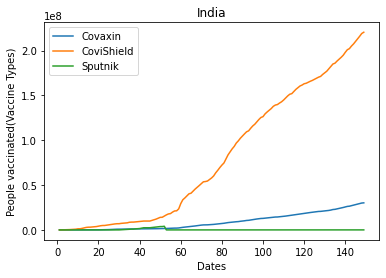

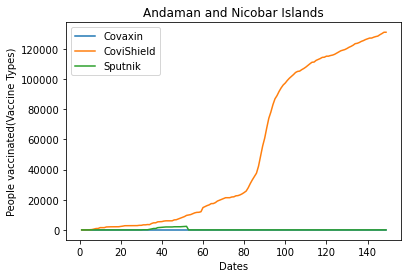

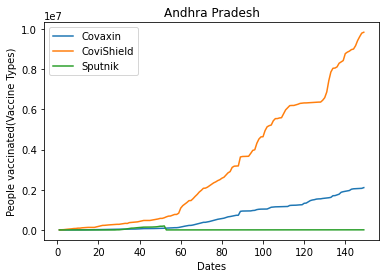

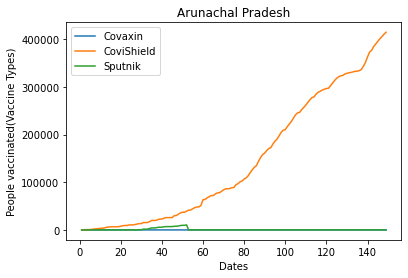

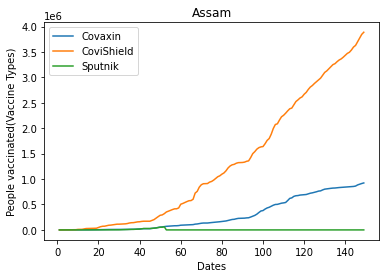

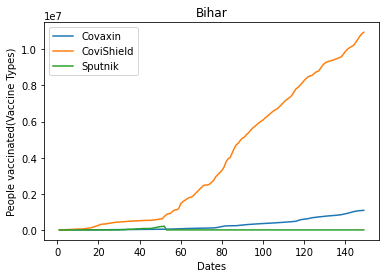

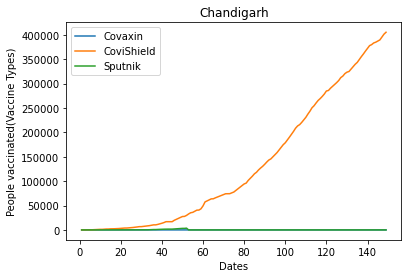

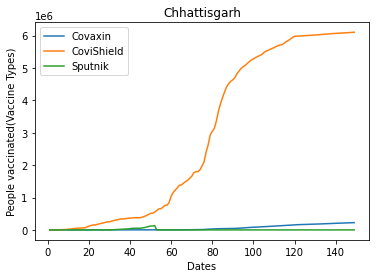

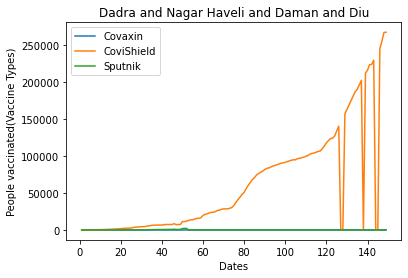

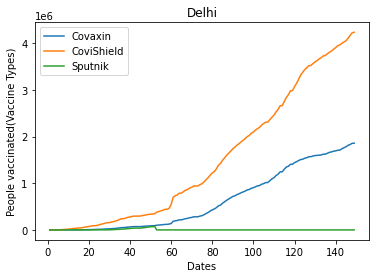

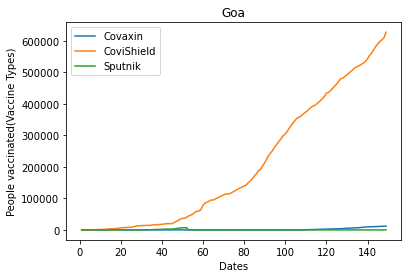

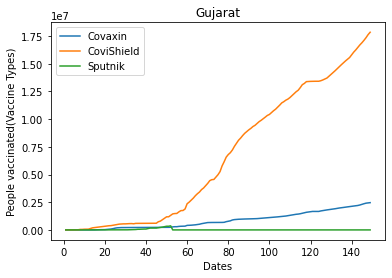

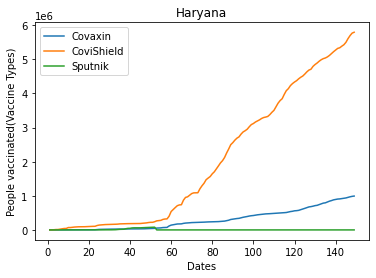

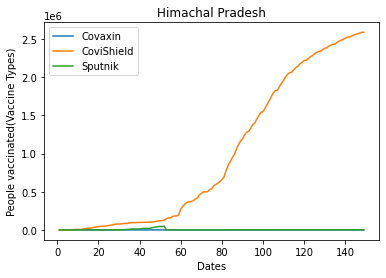

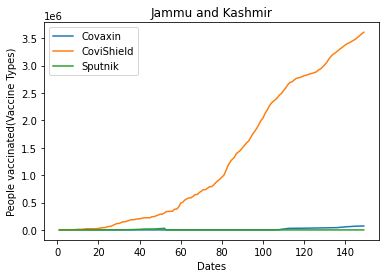

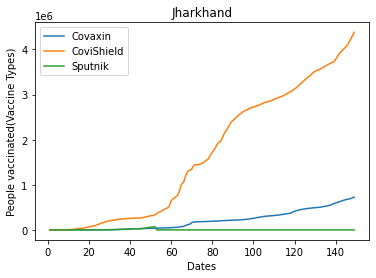

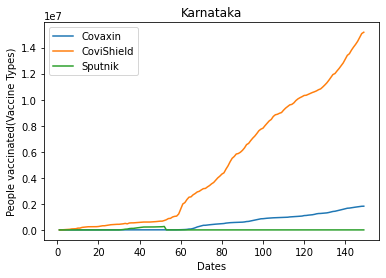

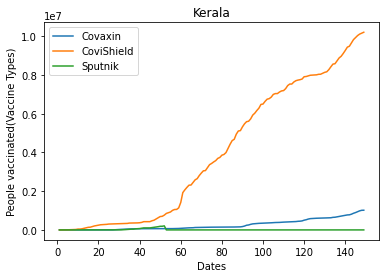

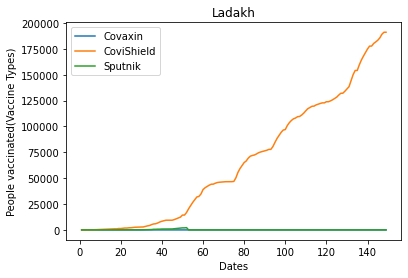

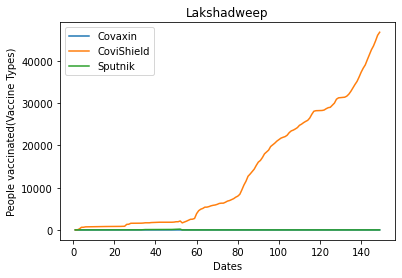

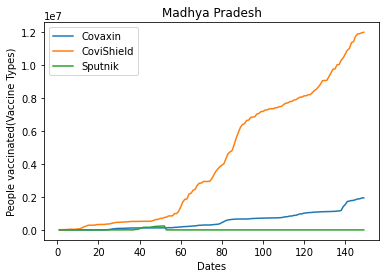

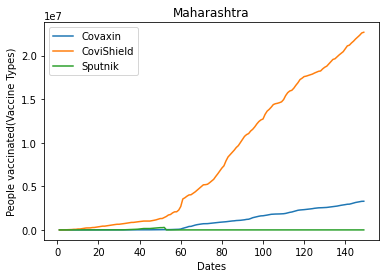

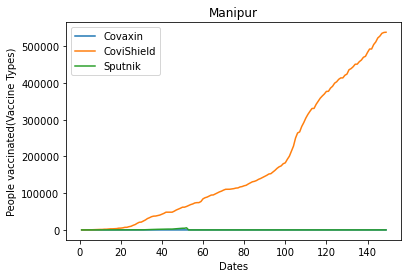

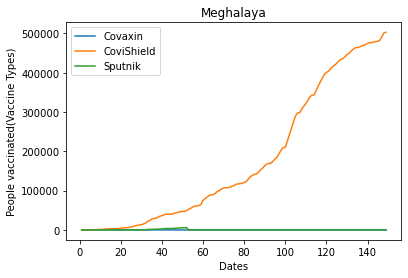

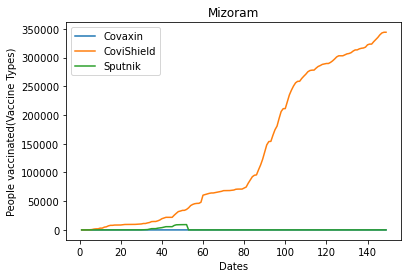

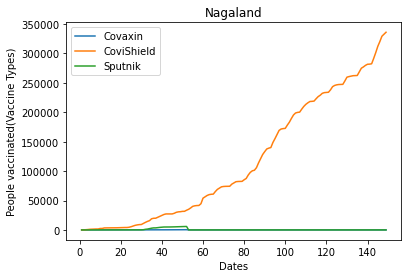

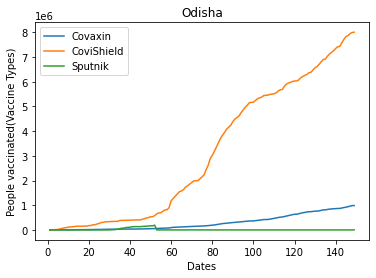

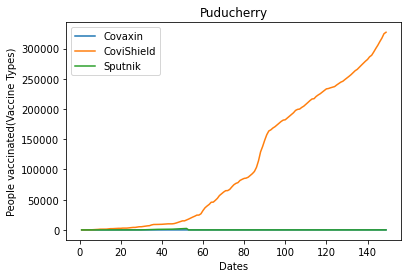

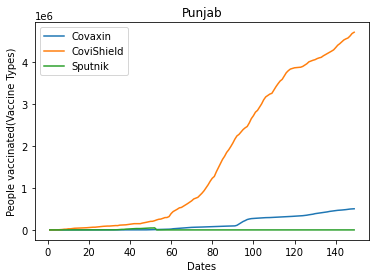

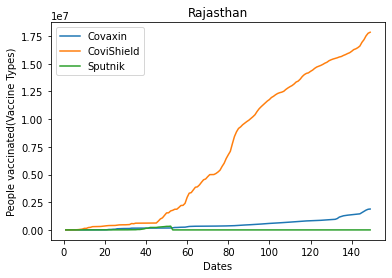

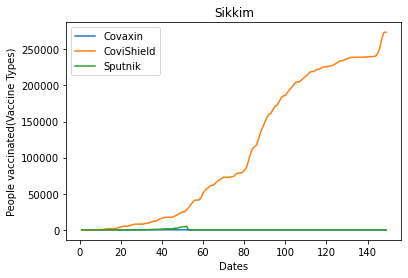

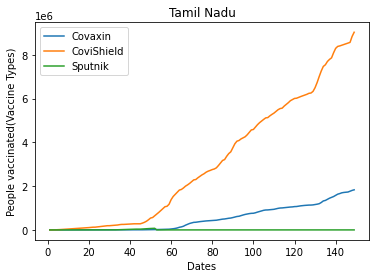

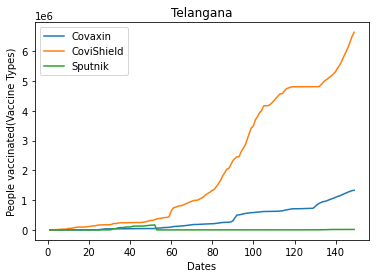

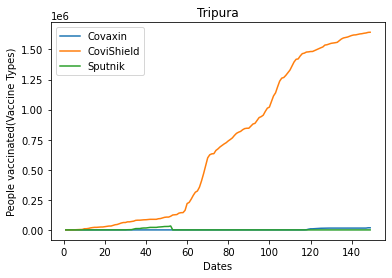

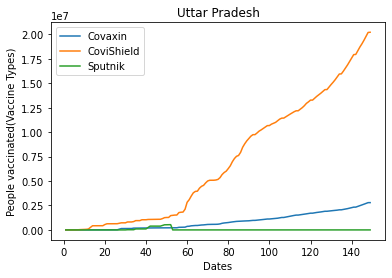

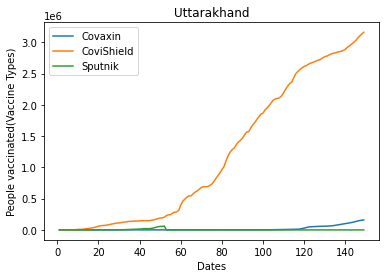

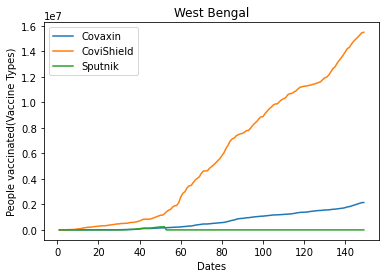

In [44]:
for i in range(0,5513,149):
    cnt=1
    start=i
    end=i+148
    date=[]
    covsh=[]
    covx=[]
    sput=[]
    for j in range(start, end+1):
        date.append(cnt)
        covsh.append(int(vaccine.iloc[j,12]))
        covx.append(int(vaccine.iloc[j,11]))
        sput.append(int(vaccine.iloc[j,13]))
        cnt+=1
    plt.plot(date,covx)
    plt.plot(date,covsh)
    plt.plot(date,sput)
    plt.title(vaccine1.iloc[i,2])
    plt.xlabel("Dates")
    plt.ylabel("People vaccinated(Vaccine Types)")
    plt.legend(["Covaxin","CoviShield","Sputnik"])
    plt.savefig("type"+str(i//149)+".png")
    plt.show()

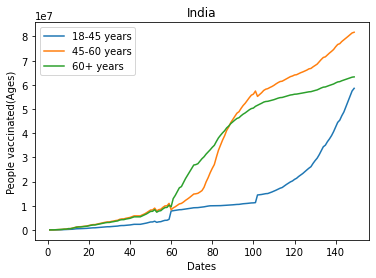

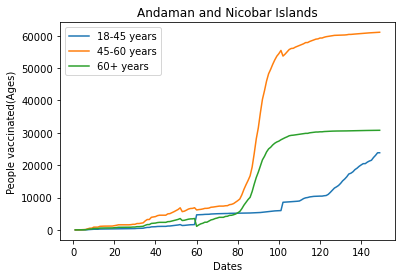

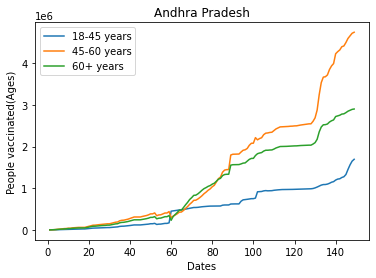

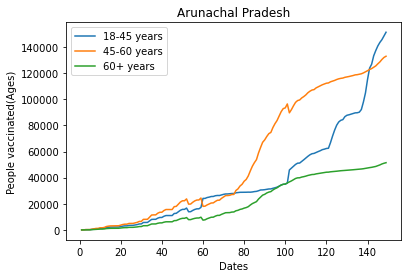

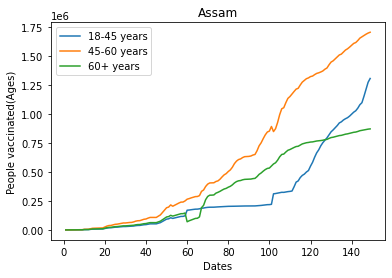

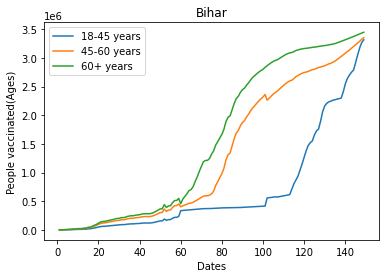

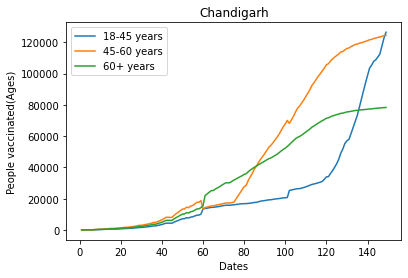

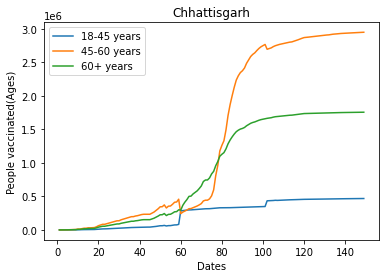

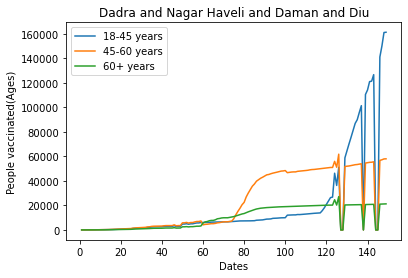

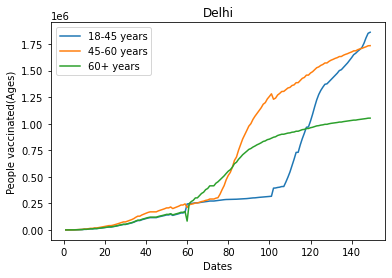

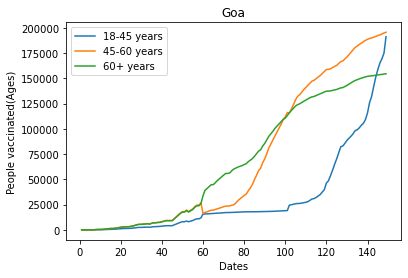

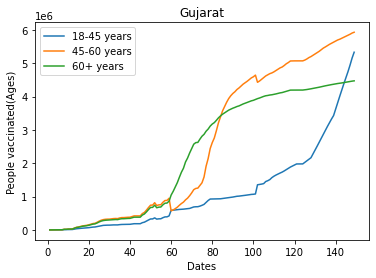

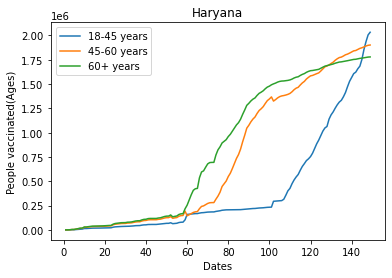

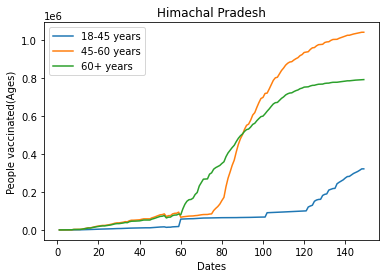

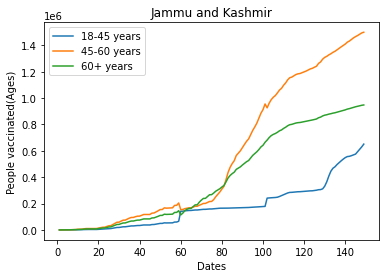

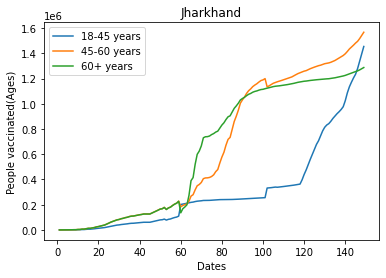

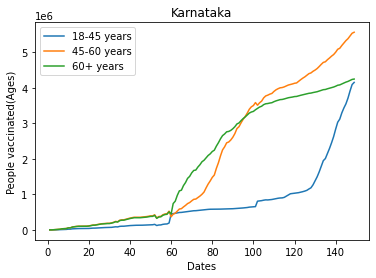

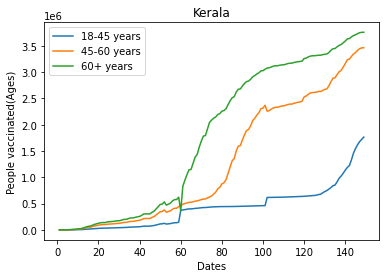

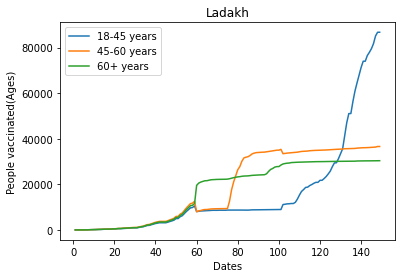

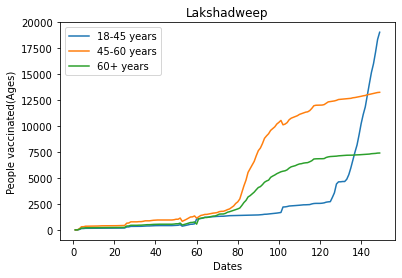

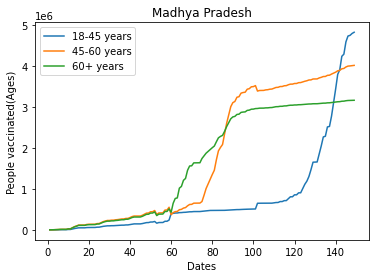

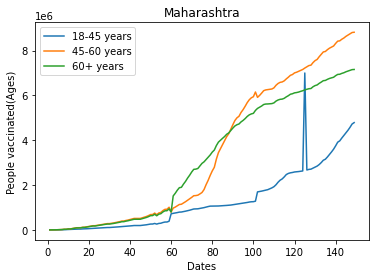

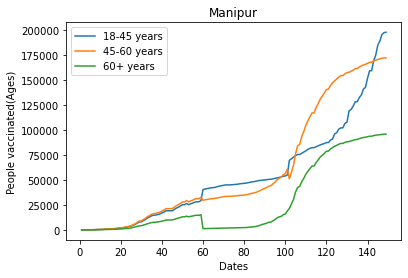

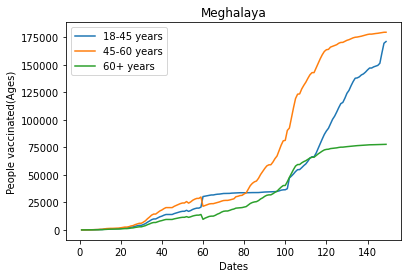

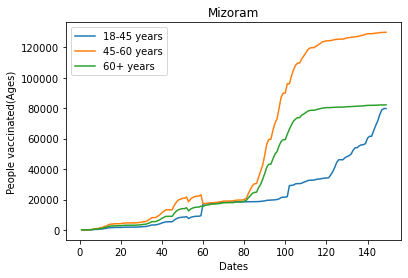

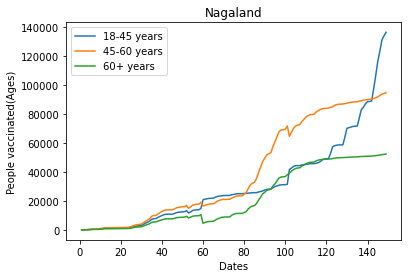

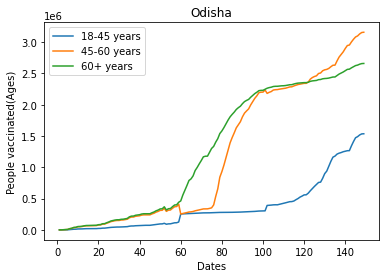

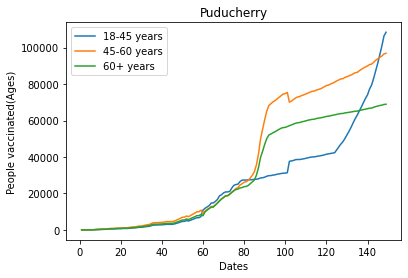

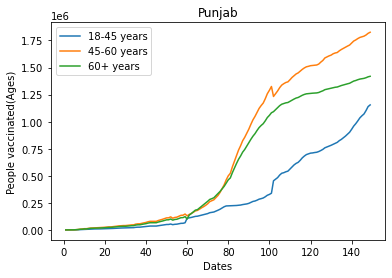

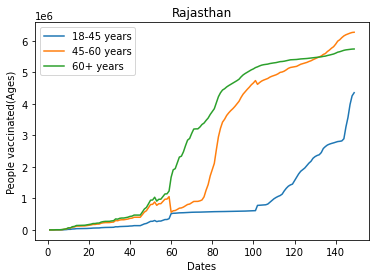

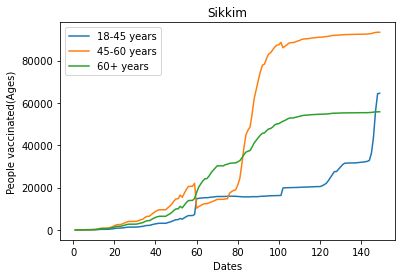

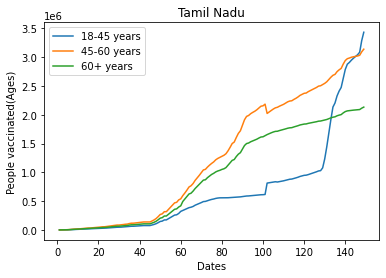

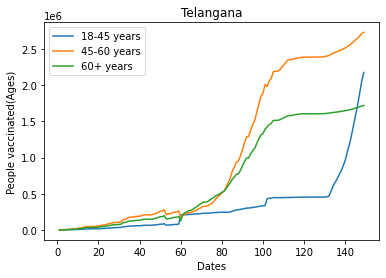

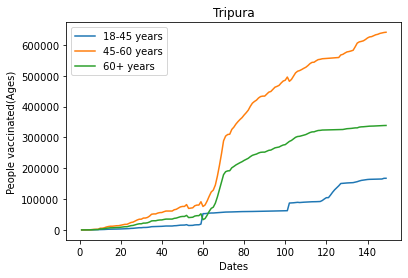

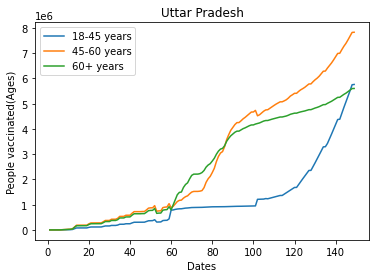

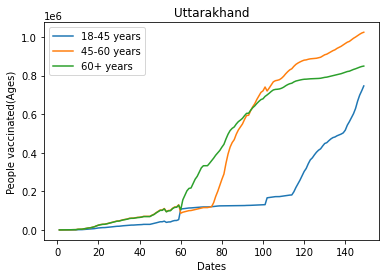

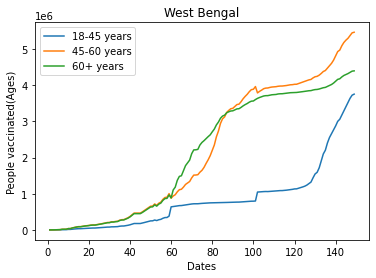

In [43]:
date=[(i+1) for i in range(149)]
for i in range(0,5513,149):
    start=i
    end=i+148

    s=[0 for i in range(149)]
    b=[0 for i in range(149)]
    g=[0 for i in range(149)]
    cur=0
    for j in range(start,end+1):
        s[cur]+=vaccine.iloc[j,15]
        b[cur]+=vaccine.iloc[j,16]
        g[cur]+=vaccine.iloc[j,17]
        cur+=1
    
    plt.plot(date,s)
    plt.plot(date,b)
    plt.plot(date,g)
    plt.title(vaccine1.iloc[i,2])
    plt.xlabel("Dates")
    plt.ylabel("People vaccinated(Ages)")
    plt.legend(["18-45 years","45-60 years","60+ years"])
    plt.savefig('age'+str(i//149)+'.png')
    plt.show()

In [17]:
x_train=[]
y_train=[]

for i in range(0,5513,149):
    start=i 
    end=i+148
    x1=[]
    y1=[]
    for j in range(start,end+1):
        x1.append([j-start+1])
        if(j==start):
            y1.append([vaccine.iloc[j,18]])
        else:
            y1.append([vaccine.iloc[j,18]-vaccine.iloc[j-1,18]])
            
    x_train.append(x1)
    y_train.append(y1)


In [18]:
x_train[0]

[[1],
 [2],
 [3],
 [4],
 [5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45],
 [46],
 [47],
 [48],
 [49],
 [50],
 [51],
 [52],
 [53],
 [54],
 [55],
 [56],
 [57],
 [58],
 [59],
 [60],
 [61],
 [62],
 [63],
 [64],
 [65],
 [66],
 [67],
 [68],
 [69],
 [70],
 [71],
 [72],
 [73],
 [74],
 [75],
 [76],
 [77],
 [78],
 [79],
 [80],
 [81],
 [82],
 [83],
 [84],
 [85],
 [86],
 [87],
 [88],
 [89],
 [90],
 [91],
 [92],
 [93],
 [94],
 [95],
 [96],
 [97],
 [98],
 [99],
 [100],
 [101],
 [102],
 [103],
 [104],
 [105],
 [106],
 [107],
 [108],
 [109],
 [110],
 [111],
 [112],
 [113],
 [114],
 [115],
 [116],
 [117],
 [118],
 [119],
 [120],
 [121],
 [122],
 [123],
 [124],
 [125],
 [126],
 [127],
 [128],
 [129],
 [130],
 [131],
 [132],
 [133],
 [134],
 [135],
 [136],
 [137],
 [138],
 [13

In [19]:
y_train[0]

[[48276.0],
 [10328.0],
 [40845.0],
 [96076.0],
 [55755.0],
 [114685.0],
 [183416.0],
 [209627.0],
 [76050.0],
 [442046.0],
 [16680.0],
 [432706.0],
 [569001.0],
 [519312.0],
 [252933.0],
 [59371.0],
 [223158.0],
 [177706.0],
 [297864.0],
 [488469.0],
 [451620.0],
 [345903.0],
 [56272.0],
 [447400.0],
 [386975.0],
 [459796.0],
 [496283.0],
 [465264.0],
 [284394.0],
 [24067.0],
 [521373.0],
 [323575.0],
 [446013.0],
 [315028.0],
 [903241.0],
 [377605.0],
 [31899.0],
 [592667.0],
 [354089.0],
 [445190.0],
 [776116.0],
 [741858.0],
 [51.0],
 [225.0],
 [0.0],
 [972746.0],
 [849929.0],
 [1151820.0],
 [1335970.0],
 [1299155.0],
 [117838.0],
 [1749834.0],
 [-2678257.0],
 [1178304.0],
 [415440.0],
 [1818172.0],
 [1387445.0],
 [158146.0],
 [2300500.0],
 [6252495.0],
 [4625275.0],
 [2274384.0],
 [2538815.0],
 [2568649.0],
 [767504.0],
 [2559261.0],
 [2768519.0],
 [2243085.0],
 [2372983.0],
 [2431944.0],
 [2214272.0],
 [321684.0],
 [625944.0],
 [1807178.0],
 [1945348.0],
 [2426132.0],
 [3729114.0

In [20]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

predict=[]
for i in range(len(x_train)):
    model = pm.auto_arima(y_train[i], start_p=1, start_q=1,
    test='adf', 
    max_p=3, max_q=3, 
    m=1, 
    d=None, 
    seasonal=False, 
    start_P=0,
    D=0,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True)
    #print(model.summary())
    n_periods = 7
    fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = np.arange(len(y_train[i]), len(y_train[i])+n_periods)

    fc_series = pd.Series(fc, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    n_periods = 7
    fc = model.predict(n_periods=n_periods, return_conf_int=False)
    fc=list(fc)
    predict.append(fc)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4482.779, Time=3.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4523.234, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4499.560, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4482.093, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4521.253, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4483.491, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4484.982, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4480.337, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4480.271, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4497.629, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=4481.882, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=4481.699, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=4480.766, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=4490.985, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]          

 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3543.193, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=3548.112, Time=0.04 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3541.597, Time=0.23 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 1.884 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3554.032, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3585.813, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3583.488, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3565.803, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3546.326, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3567.057, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=3547.901, Time=0.14 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3538.353, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3546.911, Time=0.08 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=3550.535, Time=0.14 sec
 ARIMA(2,0,3)(0,0,0)[0

 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3393.337, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3395.227, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3395.356, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3411.822, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3395.362, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.659 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3730.829, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3774.982, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3746.383, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3729.137, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3772.996, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3731.555, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3729.526, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3727.285, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2780.994, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2847.303, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2780.365, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2781.304, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2781.944, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2785.821, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2782.594, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2778.262, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2779.118, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2788.587, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2778.530, Time=0.20 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2779.258, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2779.903, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2783.832, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=2779.649, Time=0.37 sec

Best mode

 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3299.720, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3300.031, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3298.109, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3308.046, Time=0.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3300.570, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3295.485, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3298.637, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3309.510, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3297.399, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3297.486, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3295.924, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=3306.150, Time=0.05 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3298.678, Time=0.17 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 1.714 seconds
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0

 ARIMA(0,1,2)(0,0,0)[0]             : AIC=3254.133, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3258.282, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=3254.176, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=3255.512, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3252.162, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3268.623, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3254.064, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=3262.095, Time=0.02 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3255.959, Time=0.12 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 0.956 seconds
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3757.079, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3800.487, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3784.827, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3756.412, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0

In [21]:
predict1=predict.copy()

In [22]:
for i in range(148,5513,149):
    predict1[i//149][0]+=vaccine.iloc[i,18]
for i in range(len(predict1)):
    for j in range(1,len(predict1[i])):
        predict1[i][j]+=predict1[i][j-1]
predict1  # has data for different states from 14th June - 20th June

[[253247006.3251993,
  256030763.5365399,
  258853070.98507607,
  261683074.04014337,
  264514613.33374488,
  267346459.2995787,
  270178366.4849796],
 [131330.44403156594,
  131597.8880631319,
  131865.33209469783,
  132132.77612626378,
  132400.22015782972,
  132667.66418939567,
  132935.1082209616],
 [12085703.03137232,
  12229432.104799172,
  12372446.11638737,
  12514748.62361781,
  12656343.166272681,
  12797233.26652352,
  12937422.429018818],
 [419382.26836668205,
  424185.80420406413,
  428976.3846395593,
  433737.6701170886,
  438466.5625700473,
  443162.62422217056,
  447825.9507351677],
 [4885331.004667839,
  4954389.708397533,
  5002692.309161859,
  5057656.690688868,
  5123862.548263842,
  5172849.341538072,
  5213403.282898322],
 [12157302.812913492,
  12288846.123516014,
  12421616.124215277,
  12554626.139133872,
  12687683.115241472,
  12820749.279776651,
  12953817.242119834],
 [409348.5666300787,
  413392.0627888341,
  417429.0978194759,
  421454.27197661577,
  4254

In [23]:
states=[]
for i in range(0,5513,149):
    for j in range(7):
        states.append(vaccine1.iloc[i,2])

l=["14/06/2021","15/06/2021","16/06/2021","17/06/2021","18/06/2021","19/06/2021","20/06/2021"]
dates=[]
for i in range(0,5513,149):
    for j in l:
        dates.append(j)

values=[]
for i in predict1:
    for j in i:
        values.append(j)

data={"State":states, "Date":dates, "Expected Doses Administered":values}
result = pd.DataFrame(data)
result.to_csv("ARIMA.csv")
result

,State,Date,Expected Doses Administered
0,India,14/06/2021,2.532470e+08
1,India,15/06/2021,2.560308e+08
2,India,16/06/2021,2.588531e+08
3,India,17/06/2021,2.616831e+08
4,India,18/06/2021,2.645146e+08
...,...,...,...
254,West Bengal,16/06/2021,1.815438e+07
255,West Bengal,17/06/2021,1.828887e+07
256,West Bengal,18/06/2021,1.844846e+07
257,West Bengal,19/06/2021,1.860977e+07


In [24]:
predict1

[[253247006.3251993,
  256030763.5365399,
  258853070.98507607,
  261683074.04014337,
  264514613.33374488,
  267346459.2995787,
  270178366.4849796],
 [131330.44403156594,
  131597.8880631319,
  131865.33209469783,
  132132.77612626378,
  132400.22015782972,
  132667.66418939567,
  132935.1082209616],
 [12085703.03137232,
  12229432.104799172,
  12372446.11638737,
  12514748.62361781,
  12656343.166272681,
  12797233.26652352,
  12937422.429018818],
 [419382.26836668205,
  424185.80420406413,
  428976.3846395593,
  433737.6701170886,
  438466.5625700473,
  443162.62422217056,
  447825.9507351677],
 [4885331.004667839,
  4954389.708397533,
  5002692.309161859,
  5057656.690688868,
  5123862.548263842,
  5172849.341538072,
  5213403.282898322],
 [12157302.812913492,
  12288846.123516014,
  12421616.124215277,
  12554626.139133872,
  12687683.115241472,
  12820749.279776651,
  12953817.242119834],
 [409348.5666300787,
  413392.0627888341,
  417429.0978194759,
  421454.27197661577,
  4254

In [25]:
x_test=[]
for i in range(len(x_train)):
    l=[]
    for j in range(150,157):
        l.append([j])
    x_test.append(l)

In [26]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression

predict2=[]
for i in range(len(x_train)):
    x=x_train[i]
    y=y_train[i]
    poly_features=PolynomialFeatures(degree=1) 
    x_poly=poly_features.fit_transform(x) 
    lin_reg=LinearRegression()
    lin_reg.fit(x_poly,y) 
    
    x_new=x_test[i]
    x_poly_new=poly_features.fit_transform(x_new)
    predict2.append(lin_reg.predict(x_poly_new))

for i in range(148,5513,149):
    predict2[i//149][0]+=vaccine.iloc[i,18]
for i in range(len(predict2)):
    for j in range(1,len(predict2[i])):
        predict2[i][j]+=predict2[i][j-1]
predict2  # has data for different states from 14th June - 20th June

[array([[2.53813223e+08],
        [2.56989745e+08],
        [2.60185928e+08],
        [2.63401773e+08],
        [2.66637280e+08],
        [2.69892447e+08],
        [2.73167276e+08]]),
 array([[132518.9518411 ],
        [133982.58814076],
        [135453.90889897],
        [136932.91411573],
        [138419.60379104],
        [139913.9779249 ],
        [141416.03651732]]),
 array([[12125600.46834754],
        [12293726.07269363],
        [12463007.81303827],
        [12633445.68938146],
        [12805039.7017232 ],
        [12977789.85006349],
        [13151696.13440232]]),
 array([[420032.27571195],
        [425451.23680029],
        [430904.88326501],
        [436393.21510611],
        [441916.2323236 ],
        [447473.93491747],
        [453066.32288772]]),
 array([[4878134.48957011],
        [4944771.85287139],
        [5011861.08990386],
        [5079402.20066751],
        [5147395.18516234],
        [5215840.04338835],
        [5284736.77534555]]),
 array([[12185342.78586976],
  

In [27]:
values1=[]
for i in predict2:
    for j in i:
        values1.append(j[0])

data1={"State":states, "Date":dates, "Expected Doses Administered":values1}
result1 = pd.DataFrame(data1)
result1.to_csv("Poly_reg.csv")
result1

,State,Date,Expected Doses Administered
0,India,14/06/2021,2.538132e+08
1,India,15/06/2021,2.569897e+08
2,India,16/06/2021,2.601859e+08
3,India,17/06/2021,2.634018e+08
4,India,18/06/2021,2.666373e+08
...,...,...,...
254,West Bengal,16/06/2021,1.830571e+07
255,West Bengal,17/06/2021,1.852428e+07
256,West Bengal,18/06/2021,1.874413e+07
257,West Bengal,19/06/2021,1.896526e+07
